In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
# from mpl_toolkits.mplot3d import Axes3D
# import statsmodels.api as sm
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import scale
#from sklearn.neighbors import LocalOutlierFactor
#from scipy.stats import levene
#from scipy.stats import shapiro
#from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
#(V)
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
#from lightgbm import LGBMRegressor, LGBMClassifier
#from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
import statistics
import sklearn.metrics as metrics

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')
os.chdir("/content/gdrive/My Drive/資訊科學概論/final/") #更改路徑
os.getcwd() #查看當前路徑
AlzheimerData = pd.read_csv("alzheimer.csv")
data = AlzheimerData.copy() # for VISUALIZATION
data["Group"] = pd.Categorical(data["Group"])
data["M/F"] = pd.Categorical(data["M/F"])
data["SES"] = pd.Categorical(data["SES"])
data["CDR"] = pd.Categorical(data["CDR"])
data["EDUC"] = pd.Categorical(data["EDUC"])
data["Age"] = pd.Categorical(data["Age"])

df = data.select_dtypes(include=["float64","int64","int32"])

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:

print(data.shape)
print("-."*40)
print(data.columns)
print("-."*40)
print(data.info())
print("-."*40)
print(data.describe().T)
print("-."*40)
print(data.groupby(["Group","SES"])["MMSE"].mean())
print("-."*40)
print(data.groupby(["Group","SES"])["eTIV"].mean())
print("-."*40)
print(data.groupby(["Group","SES"])["nWBV"].mean())
print("-."*40)
print(data.groupby(["Group","SES"])["ASF"].mean())
print("-."*40)
print(data.groupby(["Group","CDR"])["MMSE"].mean())
print("-."*40)
print(data.groupby(["Group","CDR"])["eTIV"].mean())
print("-."*40)
print(data.groupby(["Group","CDR"])["nWBV"].mean())
print("-."*40)
print(data.groupby(["Group","CDR"])["ASF"].mean())
print("-."*40)
print(data["Group"].value_counts())
print("-."*40)
print(data["EDUC"].value_counts())
print("-."*40)
print(data["M/F"].value_counts())
print("-."*40)
print(df.corr())
print("-."*40)
print(data.isnull().sum())
print("-."*40)

(373, 10)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Group   373 non-null    category
 1   M/F     373 non-null    category
 2   Age     373 non-null    category
 3   EDUC    373 non-null    category
 4   SES     354 non-null    category
 5   MMSE    371 non-null    float64 
 6   CDR     373 non-null    category
 7   eTIV    373 non-null    int64   
 8   nWBV    373 non-null    float64 
 9   ASF     373 non-null    float64 
dtypes: category(6), float64(3), int64(1)
memory usage: 16.4 KB
None
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
    

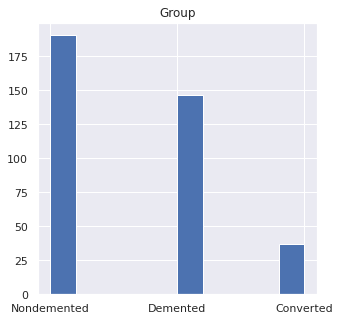

In [ ]:
data["Group"].hist(figsize=(5,5))
plt.title('Group')
plt.show()

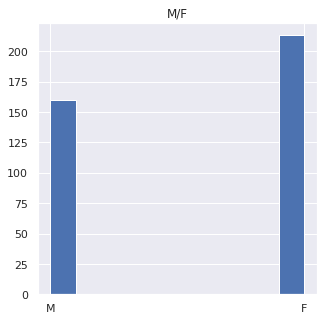

In [ ]:
data["M/F"].hist(figsize=(5,5))
plt.title('M/F')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


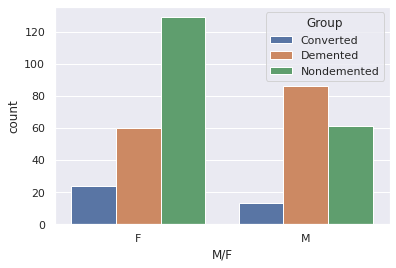

In [ ]:
ax = sns.countplot("M/F",hue="Group",data=data)
plt.show()

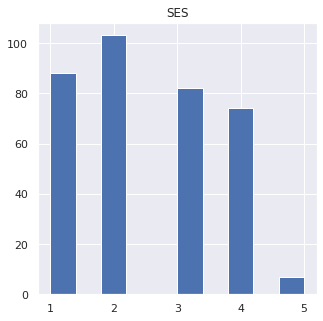

In [ ]:
data["SES"].hist(figsize=(5,5))
plt.title('SES')
plt.show()

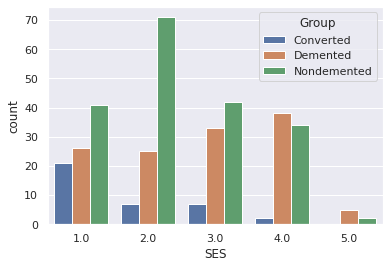

In [ ]:
ax = sns.countplot("SES",hue="Group",data=data)
plt.show()

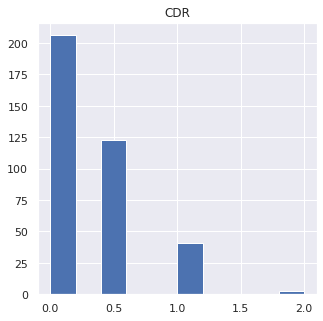

In [ ]:
data["CDR"].hist(figsize=(5,5))
plt.title('CDR')
plt.show()

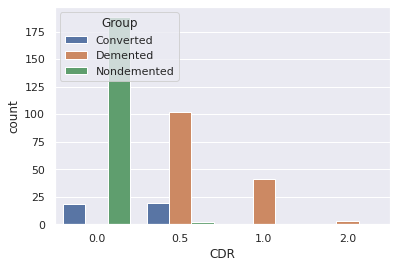

In [ ]:
ax = sns.countplot("CDR",hue="Group",data=data)
plt.show()

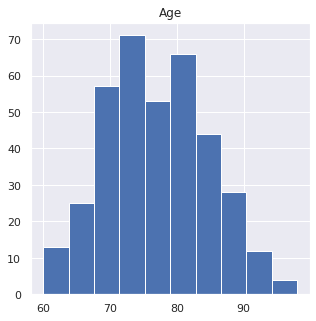

In [ ]:
data["Age"].hist(figsize=(5,5))
plt.title('Age')
plt.show()

In [ ]:
sns.boxplot(x=data["Group"],y=data["Age"])

TypeError: ignored

In [ ]:
data["EDUC"].hist(figsize=(5,5))
plt.title('EDUC')
plt.show()

In [ ]:
sns.boxplot(x=data["Group"],y=data["EDUC"])

In [ ]:
data["MMSE"].hist(figsize=(5,5))
plt.title('MMSE')
plt.show()

In [ ]:
sns.boxplot(x=data["Group"],y=data["MMSE"])

In [ ]:
data["eTIV"].hist(figsize=(5,5))
plt.title('eTIV')
plt.show()

In [ ]:
sns.boxplot(x=data["Group"],y=data["eTIV"])

In [ ]:
data["nWBV"].hist(figsize=(5,5))
plt.title('nWBV')
plt.show()

In [ ]:
sns.boxplot(x=data["Group"],y=data["nWBV"])

In [ ]:
data["ASF"].hist(figsize=(5,5))
plt.title('ASF')
plt.show()

In [ ]:
sns.boxplot(x=data["Group"],y=data["ASF"])

In [ ]:
sns.scatterplot(x="SES",y="MMSE",hue="Group",data=data)
plt.show()

In [ ]:
sns.scatterplot(x="SES",y="eTIV",hue="Group",data=data)
plt.show()

In [ ]:
sns.scatterplot(x="SES",y="nWBV",hue="Group",data=data)
plt.show()

In [ ]:
sns.scatterplot(x="SES",y="ASF",hue="Group",data=data)
plt.show()

In [ ]:
sns.lineplot(x="SES", y="MMSE",hue="Group", data=data)
plt.show()

In [ ]:
sns.lineplot(x="SES", y="eTIV",hue="Group", data=data)
plt.show()

In [ ]:
sns.lineplot(x="SES", y="nWBV",hue="Group", data=data)
plt.show()

In [ ]:
sns.lineplot(x="SES", y="ASF",hue="Group", data=data)
plt.show()

CDR and MMSE are the most important feratures and they are negatively corrolated. We can compute the prediction using these 2 features.

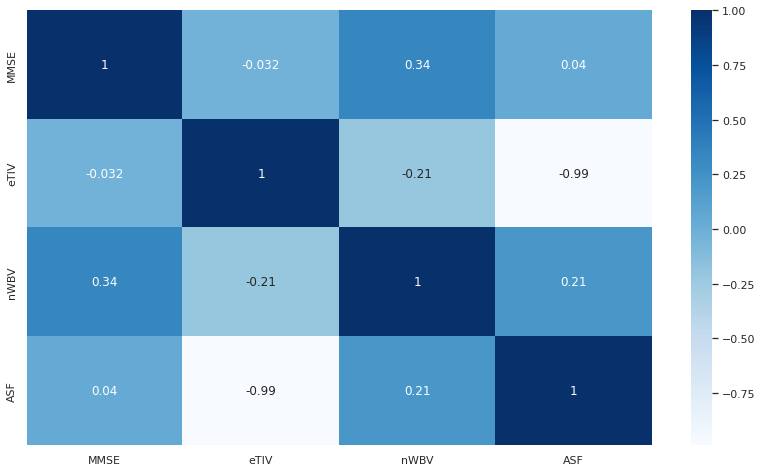

In [ ]:
plt.figure(figsize=(14,8))

corr = data.corr()

sns.heatmap(corr, 
        cmap="Blues", annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

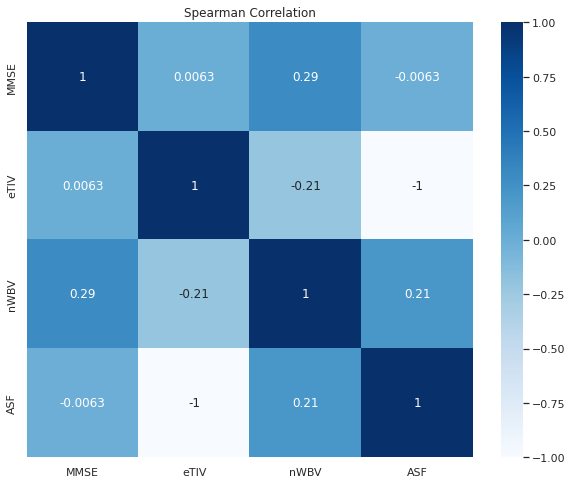

In [ ]:
corrSpearman = data.corr(method="spearman")
fig = plt.figure(figsize=(10,8))
sns.heatmap(corrSpearman,annot=True,cmap='Blues', vmin=-1, vmax=+1)

plt.title("Spearman Correlation")
plt.show()

CORRELATION VISUALIZATION

In [ ]:
Features = ["Group","Age","EDUC","MMSE","eTIV","nWBV","ASF"]

In [ ]:
corrPearson = data[Features].corr(method="pearson")
corrSpearman = data[Features].corr(method="spearman")

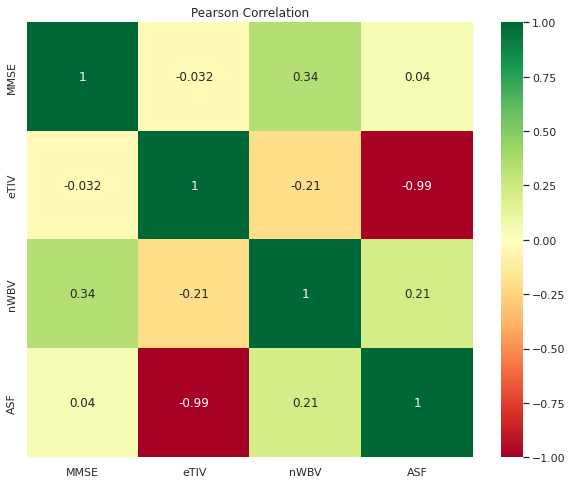

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)

plt.title("Pearson Correlation")
plt.show()

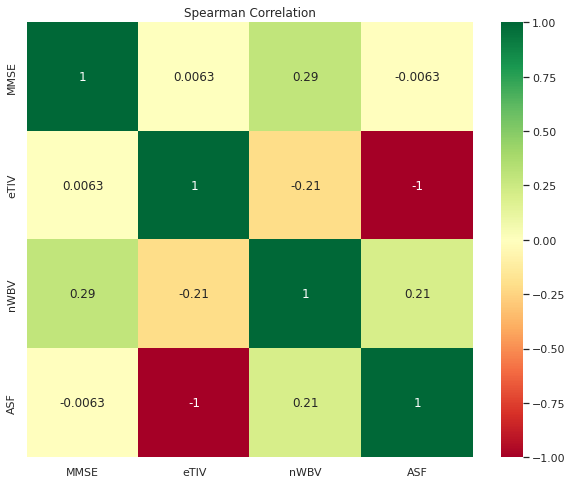

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(corrSpearman,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)

plt.title("Spearman Correlation")
plt.show()

In [ ]:
data.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
#類別資料轉01
Columns = ["Group","M/F"]
encode = LabelEncoder()
for i in Columns:
    print(data[i].value_counts())
    print("----")
    data[i] = encode.fit_transform(data[i])
    print(data[i].value_counts())
    print("----"*30)

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64
----
2    190
1    146
0     37
Name: Group, dtype: int64
------------------------------------------------------------------------------------------------------------------------
F    213
M    160
Name: M/F, dtype: int64
----
0    213
1    160
Name: M/F, dtype: int64
------------------------------------------------------------------------------------------------------------------------


In [ ]:
data['Group'].unique()

array([2, 1, 0])

In [ ]:
for i in range(data.shape[0]):
    if data.iloc[i,0]==[1]:
        data.iloc[i,0]=[0]
    if data.iloc[i,0]==[2]:
        data.iloc[i,0]=[1]

In [ ]:
data['Group'].unique()
#0:y,1:n

array([1, 0])

In [ ]:
data["SES"] = AlzheimerData["SES"]
data["CDR"] = AlzheimerData["CDR"]
data["EDUC"] = AlzheimerData["EDUC"]
data["Age"] = AlzheimerData["Age"]

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    int64  
 1   M/F     373 non-null    int64  
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 29.3 KB
None


In [ ]:
data["SES"].fillna(statistics.mode(data["SES"]), inplace=True)
data["MMSE"].fillna(statistics.mode(data["MMSE"]), inplace=True)
print(data.isnull().sum())

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64


In [ ]:
#不看欄位id

for i in enumerate(data.columns):
    print('順序:{}, 每個欄位的獨立值 in "{}":\n'.format(i[0]+1,i[1]),data[i[1]].unique())

順序:1, 每個欄位的獨立值 in "Group":
 [1 0]
順序:2, 每個欄位的獨立值 in "M/F":
 [1 0]
順序:3, 每個欄位的獨立值 in "Age":
 [87 88 75 76 80 90 83 85 71 73 93 95 68 69 66 78 81 82 77 86 92 84 72 61
 64 74 60 62 91 79 89 70 94 97 65 67 63 96 98]
順序:4, 每個欄位的獨立值 in "EDUC":
 [14 12 18 16  8 20 13  6 17 15 23 11]
順序:5, 每個欄位的獨立值 in "SES":
 [2. 3. 4. 1. 5.]
順序:6, 每個欄位的獨立值 in "MMSE":
 [27. 30. 23. 28. 22. 29. 24. 21. 16. 25. 26. 15. 20. 19.  7.  4. 17. 18.]
順序:7, 每個欄位的獨立值 in "CDR":
 [0.  0.5 1.  2. ]
順序:8, 每個欄位的獨立值 in "eTIV":
 [1987 2004 1678 1738 1698 1215 1200 1689 1701 1699 1357 1365 1372 1272
 1257 1457 1480 1447 1482 1333 1323 1230 1212 1225 1602 1590 1651 1668
 1783 1814 1820 1813 1406 1398 1423 1587 1606 1597 1911 1926 1313 1316
 1247 1250 1420 1445 1360 1358 1353 1547 1562 1377 1390 1402 1392 1430
 1463 1307 1311 1466 1450 1460 1453 1336 1329 1359 1361 1349 1477 1487
 1483 1485 1174 1179 1310 1320 1348 1289 1295 1314 1640 1665 1451 1331
 1332 1317 1322 1476 1433 1414 1695 1708 1712 1714 1491 1505 1503 1461
 1454 1474 

In [ ]:
x = data.drop("Group",axis=1)
y = data["Group"]

xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.30,random_state=42)

KNN MODELS & ERROR & TUNING & PREDICT

由於原始數據的取值範圍差異很大，在一些機器學習算法中，如果不進行歸一化，目標函數將無法正常工作。例如，大多數分類器通過歐氏距離計算兩點之間的距離。如果其中一個特徵的值範圍很廣，則距離將由該特定特徵決定。因此，應該對所有特徵的範圍進行歸一化，以便每個特徵對最終距離的貢獻大致成比例。

In [ ]:
scaler = StandardScaler()
scaler.fit(xTrain)

xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)

In [ ]:
#以n=5進行測試
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(xTrain, yTrain)

y_pred = classifier.predict(xTest)

y_true 爲樣本真實標籤，y_pred 爲樣本預測標籤；
support：當前行的類別在測試數據中的樣本總量，如上表就是，在class 0 類別在測試集中總數量爲1；
precision：精度=正確預測的個數(TP)/被預測正確的個數(TP+FP)；人話也就是模型預測的結果中有多少是預測正確的
recall:召回率=正確預測的個數(TP)/預測個數(TP+FN)；人話也就是某個類別測試集中的總量，有多少樣本預測正確了；
f1-score:F1 = 2*精度*召回率/(精度+召回率)
micro avg：計算所有數據下的指標值，假設全部數據 5 個樣本中有 3 個預測正確，所以 micro avg 爲 3/5=0.6
macro avg：每個類別評估指標未加權的平均值，比如準確率的 macro avg，(0.50+0.00+1.00)/3=0.5
weighted avg：加權平均，就是測試集中樣本量大的，我認爲它更重要，給他設置的權重大點；比如第一個值的計算方法

In [ ]:
# trying to find the best value of K
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xTrain, yTrain)
    pred_i = knn.predict(xTest)
    error.append(np.mean(pred_i != yTest))

Text(0, 0.5, 'Mean Error')

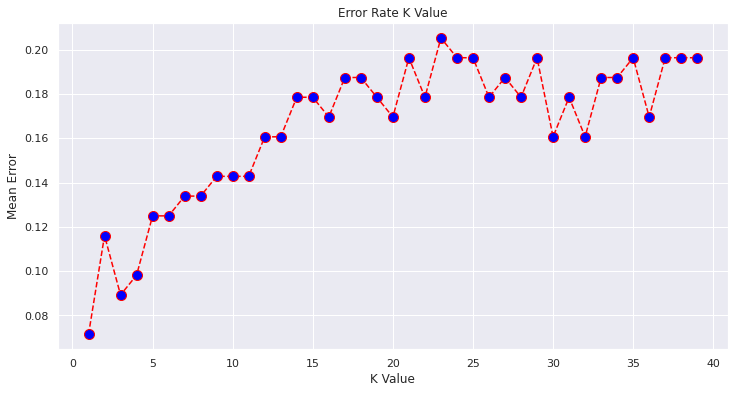

In [ ]:
#如果我們觀察訓練錯誤率圖，可以看到錯誤隨著 K 值的增加而增加，對於 K=1 錯誤也為零。這是因為最接近任何訓練數據點的點本身。因此預測總是準確的K=1。
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

預設ACC: 0.875
CV: 0.8121212121212121
RMSE 0.3535533905932738
confusion_matrix
[[47 13]
 [ 1 51]]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87        60
           1       0.80      0.98      0.88        52

    accuracy                           0.88       112
   macro avg       0.89      0.88      0.87       112
weighted avg       0.89      0.88      0.87       112

----------------------------------------
ACC: 0.9285714285714286
CV: 0.7954545454545454
RMSE 0.2672612419124244
confusion_matrix
[[53  7]
 [ 1 51]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        60
           1       0.88      0.98      0.93        52

    accuracy                           0.93       112
   macro avg       0.93      0.93      0.93       112
weighted avg       0.93      0.93      0.93       112

[[53  7]
 [ 1 51]]
Accuracy: 0.9285714285714286
Precision: 0.8793103448275862
Recall: 0.98076923076923

Text(30.5, 0.5, 'true')

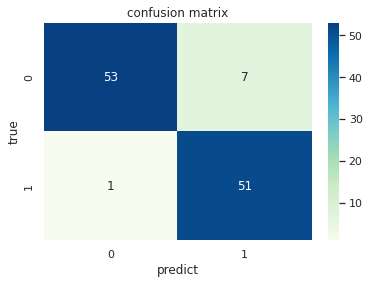

In [ ]:
#KNN
kn = KNeighborsClassifier().fit(xTrain,yTrain)
predict = kn.predict(xTest)
#已預設的N=5進行KNN
print("預設ACC:",accuracy_score(yTest,predict))
R2CV = cross_val_score(kn,xTest,yTest,cv=10).mean()
print("CV:",R2CV)
# 均方誤差（MSE）度量的是預測值和實際觀測值間差的平方的均值，誤差越小越好
error = mean_squared_error(yTest,predict)
print("RMSE",np.sqrt(error))
print("confusion_matrix")
print(confusion_matrix(yTest, predict))
print(classification_report(yTest, predict))
print("----------------------------------------")

#要找到 的最佳價值k，您將使用一個名為 的工具GridSearchCV。這是一種經常用於調整機器學習模型的超參數的工具。在您的情況下，它將通過自動找到k數據集的最佳值來提供幫助。
#params = {"n_neighbors": np.arange(1,50)}
#cv = GridSearchCV(kn,params,cv=10).fit(xTrain,yTrain)
#print(cv.best_params_)
#print(cv.best_score_)#交叉驗證中最好的結果
#'n_neighbors': 1->最佳knn為1

kntuned = KNeighborsClassifier(n_neighbors=1).fit(xTrain,yTrain)
predicttuned = kntuned.predict(xTest)

print("ACC:",accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(kntuned,xTest,yTest,cv=10).mean()
print("CV:",R2CVtuned)

errortuned = mean_squared_error(yTest,predicttuned)
print("RMSE",np.sqrt(errortuned))
print("confusion_matrix")
print(confusion_matrix(yTest, predicttuned))
print(classification_report(yTest, predicttuned))

cf=confusion_matrix(yTest, predicttuned)
tp=cf[1,1]
tn=cf[0,0]
fp=cf[0,1]
fn=cf[1,0]
print(cf)
print("Accuracy:",(tp+tn)/float(tp+tn+fp+fn))
pre=tp/float(tp+fp)
print("Precision:",pre)
recall=tp/float(tp+fn)
print("Recall:",recall)
print("F1-score:",2/float((1/pre)+(1/recall)))
print("Sencificity:",tp/float(tp+fn))
print("Specificity:",tn/float(tn+fp))
auc = metrics.roc_auc_score (yTest, predicttuned)
print("AUC:",auc)
print(classification_report(yTest, predicttuned))

sns.set()
f,ax=plt.subplots()
C2= confusion_matrix(yTest, predicttuned)
sns.heatmap(C2, annot=True, ax=ax, cmap = "GnBu") #畫熱力圖

ax.set_title('confusion matrix') #標題
ax.set_xlabel('predict') #x軸
ax.set_ylabel('true') #y軸

REGRESSION CLASSIFIER TREES(CART) MODELS & ERROR & TUNING & PREDICT

In [ ]:
x = data.drop("Group",axis=1)
y = data["Group"]

xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.30,random_state=42)

ACC: 0.8839285714285714
CV: 0.8765151515151516
RMSE: 0.34069257193462343
confusion_matrix
[[52  8]
 [ 5 47]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        60
           1       0.85      0.90      0.88        52

    accuracy                           0.88       112
   macro avg       0.88      0.89      0.88       112
weighted avg       0.89      0.88      0.88       112

----------------------------------------
ACC: 0.9196428571428571
CV: 0.9196969696969697
RMSE: 0.2834733547569204
[[52  8]
 [ 1 51]]
Accuracy: 0.9196428571428571
Precision: 0.864406779661017
Recall: 0.9807692307692307
F1-score: 0.9189189189189189
Sencificity: 0.9807692307692307
Specificity: 0.8666666666666667
AUC: 0.9237179487179488
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        60
           1       0.86      0.98      0.92        52

    accuracy                           0.92       112
   macro avg

Text(30.5, 0.5, 'true')

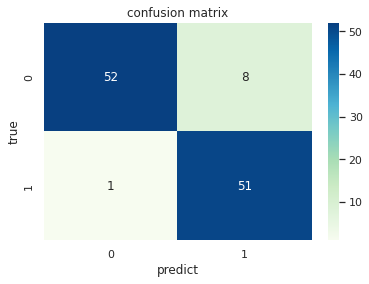

In [ ]:
#CART決策樹
cartc = DecisionTreeClassifier().fit(xTrain,yTrain)
predict = cartc.predict(xTest)

print("ACC:",accuracy_score(yTest,predict))
R2CV = cross_val_score(cartc,xTest,yTest,cv=10).mean()
print("CV:",R2CV)
error = mean_squared_error(yTest,predict)
print("RMSE:",np.sqrt(error))
print("confusion_matrix")
print(confusion_matrix(yTest, predict))
print(classification_report(yTest, predict))
print("----------------------------------------")

#查看不同深度的準確度，及節點數據集中最少要幾個樣本
params = {"max_depth":range(1,20),
         "min_samples_split":range(2,50)}

#cv = GridSearchCV(cartc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
#print(cv.best_params_)

cartctuned = DecisionTreeClassifier(max_depth=1,min_samples_split=2).fit(xTrain,yTrain)
predicttuned = cartctuned.predict(xTest)
print("ACC:",accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(cartctuned,xTest,yTest,cv=10).mean()
print("CV:",R2CVtuned)
# 0.83
errortuned = mean_squared_error(yTest,predicttuned)
print("RMSE:",np.sqrt(errortuned))
cf=confusion_matrix(yTest, predicttuned)
tp=cf[1,1]
tn=cf[0,0]
fp=cf[0,1]
fn=cf[1,0]
print(cf)
print("Accuracy:",(tp+tn)/float(tp+tn+fp+fn))
pre=tp/float(tp+fp)
print("Precision:",pre)
recall=tp/float(tp+fn)
print("Recall:",recall)
print("F1-score:",2/float((1/pre)+(1/recall)))
print("Sencificity:",tp/float(tp+fn))
print("Specificity:",tn/float(tn+fp))
auc = metrics.roc_auc_score (yTest, predicttuned)
print("AUC:",auc)
print(classification_report(yTest, predicttuned))

sns.set()
f,ax=plt.subplots()
C2= confusion_matrix(yTest, predicttuned)
sns.heatmap(C2, annot=True, ax=ax, cmap = "GnBu") #畫熱力圖

ax.set_title('confusion matrix') #標題
ax.set_xlabel('predict') #x軸
ax.set_ylabel('true') #y軸

In [ ]:
#2、选择机器学习算法
"""使用分类算法，这里选择十种分类算法"""
Classifiers=[
    ["Random Forest",RandomForestClassifier()],
    ["LogisticRegression",LogisticRegression()],
    ["KNN",KNeighborsClassifier()],
    ["Decision Tree",DecisionTreeClassifier()],
    ["XGB",XGBClassifier()]
]

In [ ]:
#3、训练模型
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
Classify_result=[]
names=[]
prediction=[]
for name,classifier in Classifiers:
    classifier = classifier
    #训练模型
    classifier.fit(x,y)
    #目标预测值
    y_pred = classifier.predict(xTest)
    #召回率
    recall = recall_score(yTest,y_pred)
    #准确率
    precision = precision_score(yTest,y_pred)
    #f1综合得分
    f1 = f1_score(yTest,y_pred)
    #准确度
    accuracy=accuracy_score(yTest,y_pred)
    #评估结果合并
    class_eva = pd.DataFrame([recall,precision,f1,accuracy])
    Classify_result.append(class_eva)
    #模型名称
    name=pd.Series(name)
    names.append(name)
    #预测结果
    y_pred = pd.Series(y_pred)
    prediction.append(y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#4、评估模型
"""recall召回率：原本为对的当中，预测为对的比例（值越大越好，1为理想状态）
precision精确率：预测为对的当中，原本为对的比例（值越大越好，1为理想状态）
F1-Score F1分数：指标综合了Precision和recall的产出结果
F1-Score取值范围0-1，1代表模型输出的结果最好，0代表模型输出结果最差
"""
names = pd.DataFrame(names)
names = names[0].tolist()
#将各个结果合并在一起
result = pd.concat(Classify_result,axis=1)
result.columns = names
result.index=["recall","precision","F1_score","accuracy_score"]
result

,Random Forest,LogisticRegression,KNN,Decision Tree,XGB
recall,1.0,0.980769,0.826923,1.0,1.000000
precision,1.0,0.864407,0.811321,1.0,0.962963
F1_score,1.0,0.918919,0.819048,1.0,0.981132
accuracy_score,1.0,0.919643,0.830357,1.0,0.982143


In [ ]:
#輸出成dot檔案格式(未調整)
from sklearn import tree
tree.export_graphviz(cartc,out_file='tree_rule.dot', 
                     feature_names=['M/F','Age','EDUC','SES','MMSE','CDR','eTIV','nWBV',"ASF"],
                     class_names=['0','1','2'],
                     filled=True,
                     node_ids=True,
                     rounded=True,
                     special_characters=True)

In [ ]:
#輸出成dot檔案格式({'max_depth': 1, 'min_samples_split': 2})
from sklearn import tree
tree.export_graphviz(cartctuned,out_file='tree_rule.dot2', 
                     feature_names=['M/F','Age','EDUC','SES','MMSE','CDR','eTIV','nWBV',"ASF"],
                     class_names=['0','1','2'],
                     filled=True,
                     node_ids=True,
                     rounded=True,
                     special_characters=True)

In [ ]:
#將dot檔案貼上dot視覺化網站
#https://dreampuf.github.io/GraphvizOnline/#digraph%20G%20%7B%0A%0A%20%20subgraph%20cluster_0%20%7B%0A%20%20%20%20style%3Dfilled%3B%0A%20%20%20%20color%3Dlightgrey%3B%0A%20%20%20%20node%20%5Bstyle%3Dfilled%2Ccolor%3Dwhite%5D%3B%0A%20%20%20%20a0%20-%3E%20a1%20-%3E%20a2%20-%3E%20a3%3B%0A%20%20%20%20label%20%3D%20%22process%20%231%22%3B%0A%20%20%7D%0A%0A%20%20subgraph%20cluster_1%20%7B%0A%20%20%20%20node%20%5Bstyle%3Dfilled%5D%3B%0A%20%20%20%20b0%20-%3E%20b1%20-%3E%20b2%20-%3E%20b3%3B%0A%20%20%20%20label%20%3D%20%22process%20%232%22%3B%0A%20%20%20%20color%3Dblue%0A%20%20%7D%0A%20%20start%20-%3E%20a0%3B%0A%20%20start%20-%3E%20b0%3B%0A%20%20a1%20-%3E%20b3%3B%0A%20%20b2%20-%3E%20a3%3B%0A%20%20a3%20-%3E%20a0%3B%0A%20%20a3%20-%3E%20end%3B%0A%20%20b3%20-%3E%20end%3B%0A%0A%20%20start%20%5Bshape%3DMdiamond%5D%3B%0A%20%20end%20%5Bshape%3DMsquare%5D%3B%0A%7D

RANDOM FORESTS (RF) MODELS & ERROR & TUNING & PREDICT

ACC: 0.9464285714285714
CV: 0.9022727272727273
RMSE: 0.34069257193462343
confusion_matrix
[[55  5]
 [ 1 51]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        60
           1       0.91      0.98      0.94        52

    accuracy                           0.95       112
   macro avg       0.95      0.95      0.95       112
weighted avg       0.95      0.95      0.95       112

----------------------------------------
ACC: 0.9196428571428571
CV: 0.9113636363636364
RMSE: 0.2834733547569204
[[52  8]
 [ 1 51]]
Accuracy: 0.9196428571428571
Precision: 0.864406779661017
Recall: 0.9807692307692307
F1-score: 0.9189189189189189
Sencificity: 0.9807692307692307
Specificity: 0.8666666666666667
AUC: 0.9237179487179488
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        60
           1       0.86      0.98      0.92        52

    accuracy                           0.92       112
   macro avg

Text(30.5, 0.5, 'true')

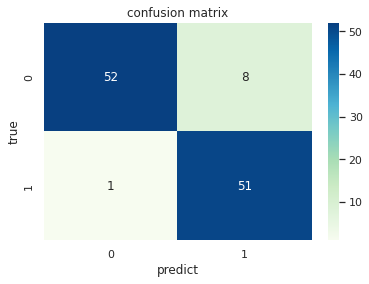

In [ ]:
rfc = RandomForestClassifier(random_state=42).fit(xTrain,yTrain)
predict = rfc.predict(xTest)

print("ACC:",accuracy_score(yTest,predict))
R2CV = cross_val_score(rfc,xTest,yTest,cv=10).mean()
print("CV:",R2CV)
print("RMSE:",np.sqrt(error))
print("confusion_matrix")
print(confusion_matrix(yTest, predict))
print(classification_report(yTest, predict))
print("----------------------------------------")
error = mean_squared_error(yTest,predict)

params = {"max_depth": [2, 5, 8, 10],
          "max_features": [2, 5, 8],
          "n_estimators": [10, 500, 1000],
          "min_samples_split": [2, 5, 10]}

#cv = GridSearchCV(rfc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
#print(cv.best_params_)

rfctuned = RandomForestClassifier(max_depth=2, max_features=2,min_samples_split=2, n_estimators=500).fit(xTrain, yTrain)

predicttuned = rfctuned.predict(xTest)
print("ACC:",accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(rfctuned,xTest,yTest,cv=10).mean()
print("CV:",R2CVtuned)
# 0.83
errortuned = mean_squared_error(yTest,predicttuned)
print("RMSE:",np.sqrt(errortuned))

cf=confusion_matrix(yTest, predicttuned)
tp=cf[1,1]
tn=cf[0,0]
fp=cf[0,1]
fn=cf[1,0]
print(cf)
print("Accuracy:",(tp+tn)/float(tp+tn+fp+fn))
pre=tp/float(tp+fp)
print("Precision:",pre)
recall=tp/float(tp+fn)
print("Recall:",recall)
print("F1-score:",2/float((1/pre)+(1/recall)))
print("Sencificity:",tp/float(tp+fn))
print("Specificity:",tn/float(tn+fp))
auc = metrics.roc_auc_score (yTest, predicttuned)
print("AUC:",auc)
print(classification_report(yTest, predicttuned))

sns.set()
f,ax=plt.subplots()
C2= confusion_matrix(yTest, predicttuned)
sns.heatmap(C2, annot=True, ax=ax, cmap = "GnBu") #畫熱力圖

ax.set_title('confusion matrix') #標題
ax.set_xlabel('predict') #x軸
ax.set_ylabel('true') #y軸

In [ ]:
rfctuned.feature_importances_

array([0.05252982, 0.02535449, 0.04771095, 0.01516039, 0.26484721,
       0.39439782, 0.04038702, 0.13008856, 0.02952375])

CDR     0.394398
MMSE    0.264847
nWBV    0.130089
M/F     0.052530
EDUC    0.047711
eTIV    0.040387
ASF     0.029524
Age     0.025354
SES     0.015160
dtype: float64


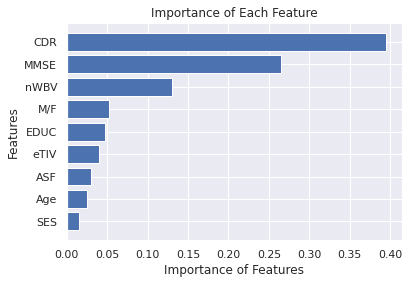

In [ ]:
#找重要特徵排序
feature_names=['M/F','Age','EDUC','SES','MMSE','CDR','eTIV','nWBV',"ASF"]
feature_imp = pd.Series(rfctuned.feature_importances_,index=feature_names).sort_values(ascending=False)
print(feature_imp)

imp=rfctuned.feature_importances_
zip(imp,feature_names)
imp, feature_names= zip(*sorted(zip(imp,feature_names)))
plt.barh(range(len(feature_names)),imp,align='center')
plt.yticks(range(len(feature_names)),feature_names)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of Each Feature')
plt.show()

LOGISTIC REGRESSION MODELS & ERROR & TUNING & PREDICT

ACC: 0.9196428571428571
訓練集:  0.9578544061302682
測試集:  0.9196428571428571
CV: 0.9015151515151514
RMSE: 0.2834733547569204
[[52  8]
 [ 1 51]]
Accuracy: 0.9196428571428571
Precision: 0.864406779661017
Recall: 0.9807692307692307
F1-score: 0.9189189189189189
Sencificity: 0.9807692307692307
Specificity: 0.8666666666666667
AUC: 0.9237179487179488
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        60
           1       0.86      0.98      0.92        52

    accuracy                           0.92       112
   macro avg       0.92      0.92      0.92       112
weighted avg       0.93      0.92      0.92       112



Text(30.5, 0.5, 'true')

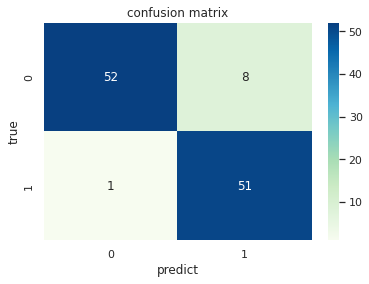

In [ ]:
lj = LogisticRegression(solver="liblinear").fit(xTrain,yTrain)
predict = lj.predict(xTest)

print("ACC:",accuracy_score(yTest,predict))
# 預測成功的比例
print('訓練集: ',lj.score(xTrain,yTrain))
print('測試集: ',lj.score(xTest,yTest))
R2CV = cross_val_score(lj,xTest,yTest,cv=10).mean()
print("CV:",R2CV)
# 0.82
error = mean_squared_error(yTest,predict)
print("RMSE:",np.sqrt(error))

cf=confusion_matrix(yTest, predicttuned)
tp=cf[1,1]
tn=cf[0,0]
fp=cf[0,1]
fn=cf[1,0]
print(cf)
print("Accuracy:",(tp+tn)/float(tp+tn+fp+fn))
pre=tp/float(tp+fp)
print("Precision:",pre)
recall=tp/float(tp+fn)
print("Recall:",recall)
print("F1-score:",2/float((1/pre)+(1/recall)))
print("Sencificity:",tp/float(tp+fn))
print("Specificity:",tn/float(tn+fp))
auc = metrics.roc_auc_score (yTest, predicttuned)
print("AUC:",auc)
print(classification_report(yTest, predicttuned))

sns.set()
f,ax=plt.subplots()
C2= confusion_matrix(yTest, predicttuned)
sns.heatmap(C2, annot=True, ax=ax, cmap = "GnBu") #畫熱力圖

ax.set_title('confusion matrix') #標題
ax.set_xlabel('predict') #x軸
ax.set_ylabel('true') #y軸

In [ ]:
#真實分類

# 建立測試集的 DataFrme
df_test=pd.DataFrame(xTest, columns= ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'])
df_test['Group'] = yTest
pred = lj.predict(xTest)
df_test['Predict'] = pred
pred

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0])

In [ ]:
lj.predict(xTest)

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0])

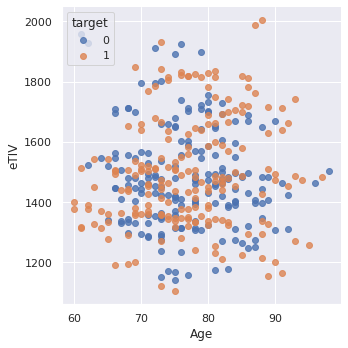

In [ ]:
sns.lmplot(x="Age", y="eTIV", data=data, hue="Group", fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['0', '1', '2'])
plt.show()

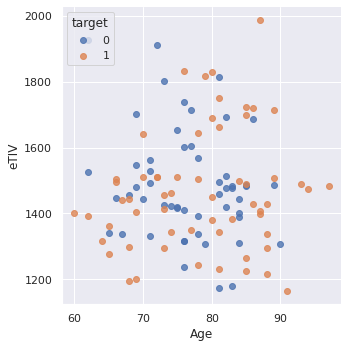

In [ ]:
sns.lmplot(x="Age", y="eTIV", hue='Predict', data=df_test, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['0','1','2'])
plt.show()

XGBOOST CLASSIFIER MODELS & ERROR & TUNING & PREDICT

ACC: 0.9196428571428571
CV: 0.9098484848484848
RMSE: 0.2834733547569204
ACC: 0.9285714285714286
CV: 0.8848484848484848
RMSE: 0.2672612419124244
[[53  7]
 [ 1 51]]
Accuracy: 0.9285714285714286
Precision: 0.8793103448275862
Recall: 0.9807692307692307
F1-score: 0.9272727272727271
Sencificity: 0.9807692307692307
Specificity: 0.8833333333333333
AUC: 0.9320512820512821
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        60
           1       0.88      0.98      0.93        52

    accuracy                           0.93       112
   macro avg       0.93      0.93      0.93       112
weighted avg       0.93      0.93      0.93       112



Text(30.5, 0.5, 'true')

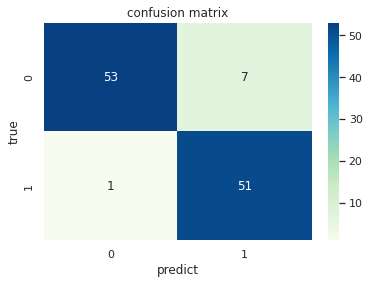

In [ ]:
xgbc = XGBClassifier(verbose=False).fit(xTrain,yTrain)
predict = xgbc.predict(xTest)

print("ACC:",accuracy_score(yTest,predict))
R2CV = cross_val_score(xgbc,xTest,yTest,cv=10).mean()
print("CV:",R2CV)
# 0.84
error = mean_squared_error(yTest,predict)
print("RMSE:",np.sqrt(error))

params = {"n_estimators": [100, 500, 1000, 2000],
          "subsample": [0.6, 0.8, 1.0],
          "max_depth": [3, 4, 5, 6],
          "learning_rate": [0.1, 0.01, 0.02, 0.05],
          "min_samples_split": [2, 5, 10]}

#cv = GridSearchCV(xgbc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
#print(cv.best_params_)

xgbctuned = XGBClassifier(learning_rate=0.1, max_depth=3, min_samples_split=2,n_estimators=100, subsample=0.6).fit(xTrain, yTrain)

predicttuned = xgbctuned.predict(xTest)
print("ACC:",accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(xgbctuned,xTest,yTest,cv=10).mean()
print("CV:",R2CVtuned)
# 0.82
errortuned = mean_squared_error(yTest,predicttuned)
print("RMSE:",np.sqrt(errortuned))

cf=confusion_matrix(yTest, predicttuned)
tp=cf[1,1]
tn=cf[0,0]
fp=cf[0,1]
fn=cf[1,0]
print(cf)
print("Accuracy:",(tp+tn)/float(tp+tn+fp+fn))
pre=tp/float(tp+fp)
print("Precision:",pre)
recall=tp/float(tp+fn)
print("Recall:",recall)
print("F1-score:",2/float((1/pre)+(1/recall)))
print("Sencificity:",tp/float(tp+fn))
print("Specificity:",tn/float(tn+fp))
auc = metrics.roc_auc_score (yTest, predicttuned)
print("AUC:",auc)
print(classification_report(yTest, predicttuned))

sns.set()
f,ax=plt.subplots()
C2= confusion_matrix(yTest, predicttuned)
sns.heatmap(C2, annot=True, ax=ax, cmap = "GnBu") #畫熱力圖

ax.set_title('confusion matrix') #標題
ax.set_xlabel('predict') #x軸
ax.set_ylabel('true') #y軸

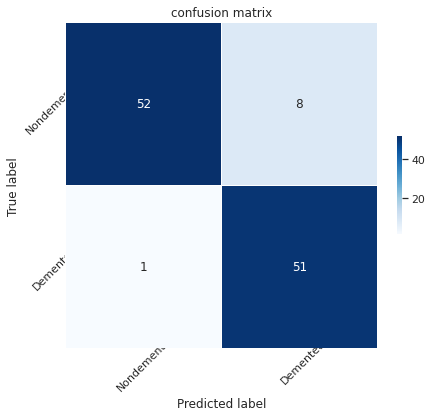

In [ ]:
#XGBTEST
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42,use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(xTrain,yTrain,verbose=0,early_stopping_rounds=5, eval_set = [(xTest,yTest)])
yPredict = xgb_model.predict(xTest)
conf_matrix = confusion_matrix(yTest, yPredict)

label_to_class = {
    'Nondemented': 0,
    'Demented': 1
}

fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar_kws={'shrink': .3}, linewidths=.1, ax=ax)

ax.set(
    xticklabels=list(label_to_class.keys()),
    yticklabels=list(label_to_class.keys()),
    title='confusion matrix',
    ylabel='True label',
    xlabel='Predicted label'
)
params = dict(rotation=45, ha='center', rotation_mode='anchor')
plt.setp(ax.get_yticklabels(), **params)
plt.setp(ax.get_xticklabels(), **params)
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


----------------------------
KNeighborsClassifier: 
Accuracy: 0.9285714285714286
----------------------------
DecisionTreeClassifier: 
Accuracy: 0.9285714285714286
----------------------------
RandomForestClassifier: 
Accuracy: 0.9285714285714286
----------------------------
LogisticRegression: 
Accuracy: 0.9285714285714286
----------------------------
XGBClassifier: 
Accuracy: 0.9285714285714286


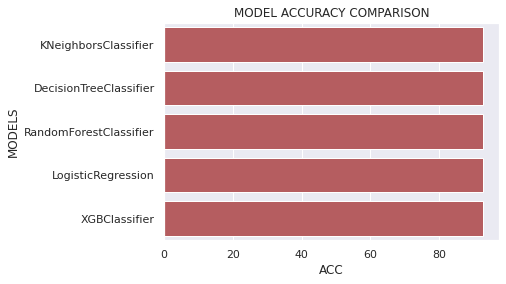

In [ ]:
models = [kntuned,cartctuned,rfctuned,lj,xgbc]
r = pd.DataFrame(columns=["MODELS","ACC"])

for model in models:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    accuracy = accuracy_score(yTest, predicttuned)
    print("-" * 28)
    print(name + ": ")
    print(f"Accuracy: {accuracy}")
    result = pd.DataFrame([[name,accuracy*100]],columns=["MODELS","ACC"])
    r = r.append(result)
    
sns.barplot(x="ACC",y="MODELS",data=r,color="r")
plt.xlabel("ACC")
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=1);
clf_tree = DecisionTreeClassifier(max_depth=1,min_samples_split=2);
clf_rfc = RandomForestClassifier(max_depth=2, max_features=2,min_samples_split=2, n_estimators=500);
clf_reg = LogisticRegression();
clf_xgb = XGBClassifier(learning_rate=0.1, max_depth=3, min_samples_split=2,n_estimators=100, subsample=0.6).fit(xTrain, yTrain);

clf_knn.fit(xTrain, yTrain); 
clf_tree.fit(xTrain, yTrain);
clf_rfc.fit(xTrain, yTrain); 
clf_reg.fit(xTrain, yTrain);
clf_reg.fit(xTrain, yTrain);

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
y_score1 = clf_knn.predict_proba(xTest)[:,1]
y_score2 = clf_tree.predict_proba(xTest)[:,1]
y_score3 = clf_rfc.predict_proba(xTest)[:,1]
y_score4 = clf_reg.predict_proba(xTest)[:,1]
y_score5 = clf_xgb.predict_proba(xTest)[:,1]

In [ ]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(yTest, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(yTest, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(yTest, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(yTest, y_score4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(yTest, y_score5)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


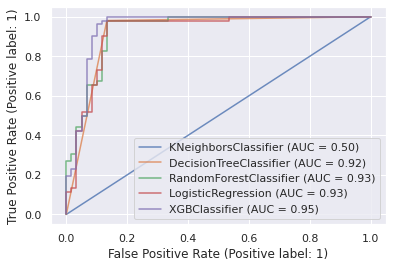

In [ ]:
## ROC Curve #比較不同模型，例如 決策樹 和 隨機森林
from sklearn.metrics import RocCurveDisplay

ax = plt.gca()
knn_disp = RocCurveDisplay.from_estimator(kntuned, xTest,yTest, ax=ax, alpha=0.8)
cartc_disp = RocCurveDisplay.from_estimator(cartctuned, xTest,yTest, ax=ax, alpha=0.8)
rfc_disp=RocCurveDisplay.from_estimator(rfctuned, xTest, yTest, ax=ax, alpha=0.8)
cartc_disp = RocCurveDisplay.from_estimator(lj, xTest,yTest, ax=ax, alpha=0.8)
rfc_disp=RocCurveDisplay.from_estimator(xgbc, xTest, yTest, ax=ax, alpha=0.8)

plt.show()

AUC: 0.9320512820512821


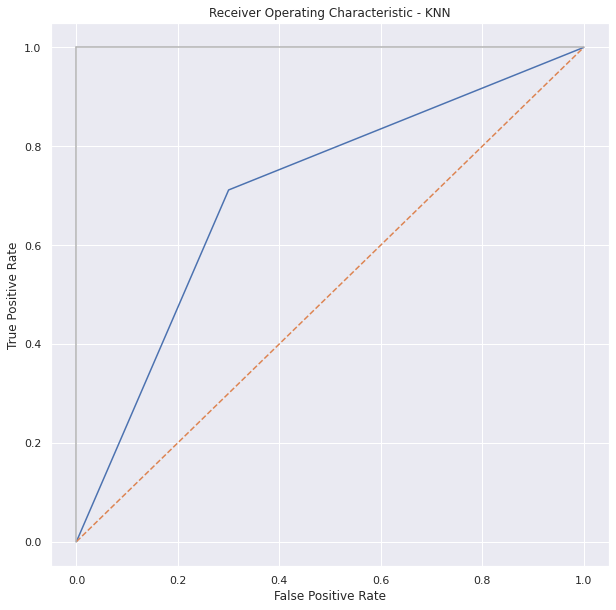

AUC: 0.9320512820512821


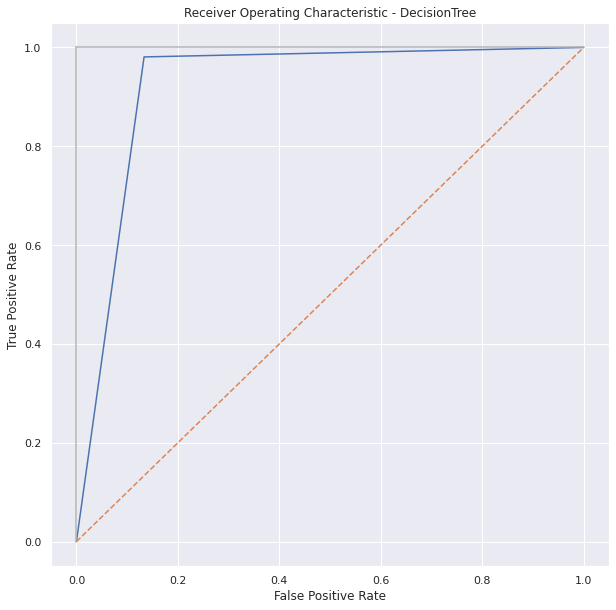

AUC: 0.9320512820512821


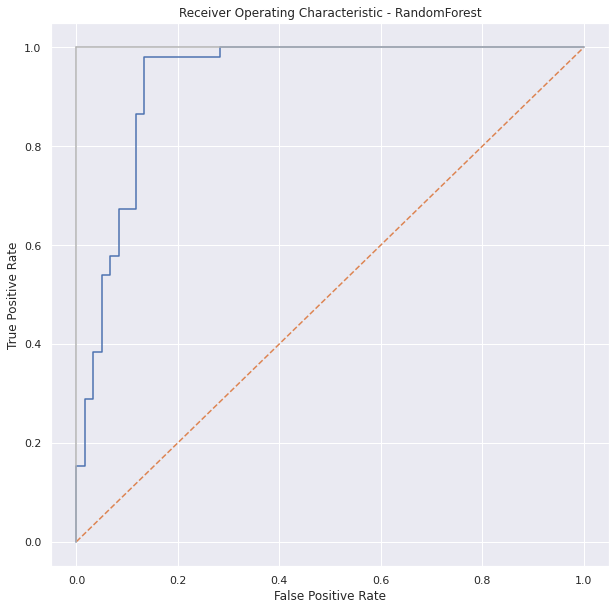

AUC: 0.9320512820512821


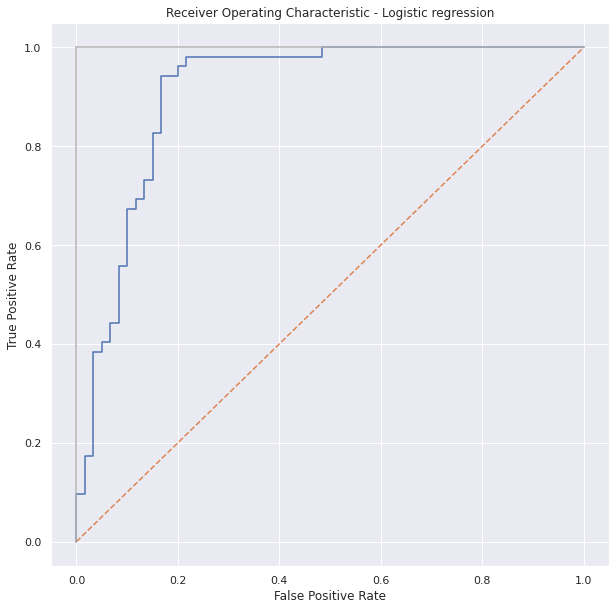

AUC: 0.9320512820512821


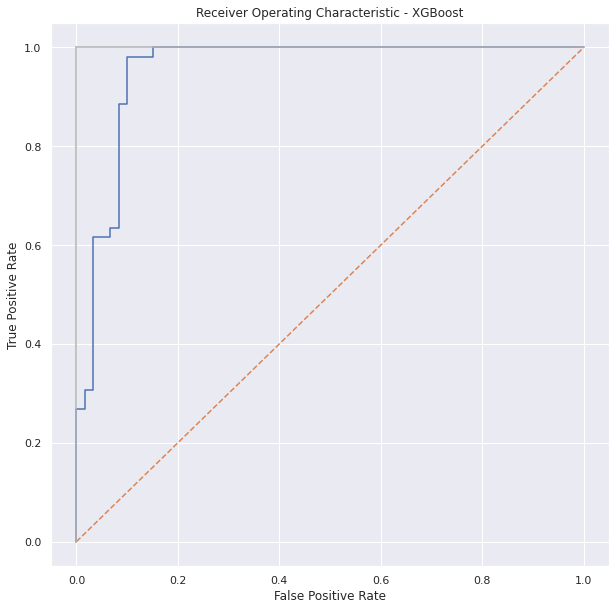

In [ ]:
#KNN
auc = metrics.roc_auc_score (yTest, predicttuned)
print("AUC:",auc)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score (yTest, predicttuned)
print("AUC:",auc)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score (yTest, predicttuned)
print("AUC:",auc)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForest')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score (yTest, predicttuned)
print("AUC:",auc)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

auc = metrics.roc_auc_score (yTest, predicttuned)
print("AUC:",auc)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XGBoost')
plt.plot(false_positive_rate5, true_positive_rate5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()